#Giải nén file và cài đặt thư viện

In [ ]:
!unzip Cranfield.zip

Archive:  Cranfield.zip
   creating: Cranfield/
  inflating: Cranfield/1.txt         
  inflating: Cranfield/10.txt        
  inflating: Cranfield/100.txt       
  inflating: Cranfield/1000.txt      
  inflating: Cranfield/1001.txt      
  inflating: Cranfield/1002.txt      
  inflating: Cranfield/1003.txt      
  inflating: Cranfield/1004.txt      
  inflating: Cranfield/1005.txt      
  inflating: Cranfield/1006.txt      
  inflating: Cranfield/1007.txt      
  inflating: Cranfield/1008.txt      
  inflating: Cranfield/1009.txt      
  inflating: Cranfield/101.txt       
  inflating: Cranfield/1010.txt      
  inflating: Cranfield/1011.txt      
  inflating: Cranfield/1012.txt      
  inflating: Cranfield/1013.txt      
  inflating: Cranfield/1014.txt      
  inflating: Cranfield/1015.txt      
  inflating: Cranfield/1016.txt      
  inflating: Cranfield/1017.txt      
  inflating: Cranfield/1018.txt      
  inflating: Cranfield/1019.txt      
  inflating: Cranfield/102.txt       
  

In [ ]:
!unzip TEST.zip

Archive:  TEST.zip
  inflating: query.txt               
   creating: RES/
  inflating: RES/1.txt               
  inflating: RES/10.txt              
  inflating: RES/100.txt             
  inflating: RES/101.txt             
  inflating: RES/102.txt             
 extracting: RES/103.txt             
  inflating: RES/104.txt             
  inflating: RES/105.txt             
  inflating: RES/106.txt             
  inflating: RES/107.txt             
  inflating: RES/108.txt             
  inflating: RES/109.txt             
  inflating: RES/11.txt              
  inflating: RES/110.txt             
  inflating: RES/111.txt             
 extracting: RES/112.txt             
  inflating: RES/113.txt             
  inflating: RES/114.txt             
  inflating: RES/115.txt             
  inflating: RES/116.txt             
 extracting: RES/117.txt             
  inflating: RES/118.txt             
 extracting: RES/119.txt             
  inflating: RES/12.txt              
  inflating: 

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ind

In [ ]:
!pip install Whoosh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 31.7 MB/s 


#Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import sys
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import time
import math
import operator
from whoosh.index import create_in
from whoosh.fields import *
from whoosh.analysis import StandardAnalyzer

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
bonus_stop = ['b', 'c', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'n', 'p', 'q', 'r', 'u', 'v', 'w', 'x', 'z']
stop_word += bonus_stop

#Đọc file

In [ ]:
f = open('/content/document.txt','r', encoding='UTF-8')
Document = f.read()
f.close()
Document = Document.replace("\n", " ")
Document = Document.lower()
Document = nltk.sent_tokenize(Document)

In [ ]:
Cranfield_read = []
for i in range(1,1401):
  path_file_name = 'Cranfield/' + str(i) + '.txt'
  f = open(path_file_name,'r', encoding='UTF-8')
  data = f.read()
  data = data.replace("\n", " ")
  data = data.lower()
  Cranfield_read.append(data)
f.close()

In [ ]:
Query_read = []
f = open('query.txt' ,'r', encoding='UTF-8')
for i in range(1,226):
  data = f.readline()
  data = data.replace("\n", " ")
  data = data.lower()
  Query_read.append(data)
f.close()

In [ ]:
RES_read_index_docs = list()
for index in range(0,225):
  f = open('/content/RES/{}.txt'.format(index+1),'r', encoding='UTF-8')
  data = f.read()
  b = data.split()
  tempt = list()
  for i in range(1,len(b),3):
    tempt.append(int(b[i]))
  RES_read_index_docs.append(tempt)
f.close()

#Các hàm tiền xử lý và build model

##Hàm xóa ký tự đặc biệt

In [ ]:
def remove_specific_characters(data):
  alphabet = ['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m','0','1','2','3','4','5','6','7','8','9',' ']
  a = []
  b = ''
  for i in range(0,len(data)):
    if data[i] in alphabet:
      a.append(data[i])
  for i in range(0,len(a)):
    b += a[i]
  return b

##Hàm tách từ

In [ ]:
def split_word(data):
  return word_tokenize(data)

##Hàm stem

In [ ]:
def word_stemmer(data):
  ps = nltk.stem.PorterStemmer()
  stemmed = []
  for words in data:
    stemmed.append(ps.stem(words))
  return stemmed

##Hàm lemma

In [ ]:
def word_lemma(data):
  wordnet_lemmatizer = WordNetLemmatizer()
  lemma = []
  for words in data:
    lemma.append(wordnet_lemmatizer.lemmatize(words, pos = 'v'))
  return lemma

##Hàm xóa stopwords

In [ ]:
def remove_stopwords(data):
  list_filter = []
  for word in data:
    if word not in stop_word:
      list_filter.append(word)
  return list_filter

##Hàm tính số lượng term

In [ ]:
def compute_quantity_term(data):
  length = 0
  for sentence in range(0,len(data)):
    temp = remove_specific_characters(data[sentence])
    temp = split_word(temp)
    length += len(temp)
  return length

##Hàm tách từ cho câu không stem + lemma

In [ ]:
def listwords_not_stemandlemma(data):
  list_words = []
  for i in range(0,len(data)):
    tempt = remove_specific_characters(data[i])
    tempt = split_word(tempt)
    tempt = remove_stopwords(tempt)
    list_words.append(tempt)
  return list_words

##Hàm tách từ cho câu có stem

In [ ]:
def listwords_and_stem(data):
  list_words = []
  for i in range(0,len(data)):
    tempt = remove_specific_characters(data[i])
    tempt = split_word(tempt)
    tempt = word_stemmer(tempt)
    tempt = remove_stopwords(tempt)
    list_words.append(tempt)
  return list_words

##Hàm tách từ cho câu có lemma

In [ ]:
def listwords_and_lemma(data):
  list_words = []
  for i in range(0,len(data)):
    tempt = remove_specific_characters(data[i])
    tempt = split_word(tempt)
    tempt = word_lemma(tempt)
    tempt = remove_stopwords(tempt)
    list_words.append(tempt)
  return list_words

##Hàm tạo chỉ mục đảo ngược

In [ ]:
#lập chỉ mục của từng tài liệu
def statistical(list_word):
  a = []
  for i in range(0,len(list_word)):
    flag = False
    for check in range(0,i):
      if list_word[i] == list_word[check]:
        flag = True
        break
    if flag == False:
      count = 1
      for j in range(i + 1,len(list_word)):
        if list_word[i] == list_word[j]:
          count += 1
      b = (list_word[i], str(count))
      a.append(b)
  return a

In [ ]:
#lập chỉ mục full tài liệu
def indexing_for_doc(list_words):
  indexing = []
  for i in list_words:
    indexing.append(statistical(i))

  result = []
  for sentences in range(0,len(indexing)):
    for words in range(0,len(indexing[sentences])):
      flag = False
      sum = int(indexing[sentences][words][1])
      for check_sentences in range(0,sentences):
        for check_words in range(0,len(indexing[check_sentences])):
          if indexing[sentences][words][0] == indexing[check_sentences][check_words][0]:
            flag = True
            break
        if flag == True:
            break
      if flag == False:
        b = [sentences+1]
        count = 1
        for sentences_com in range(sentences+1,len(indexing)):
          for words_com in range(0,len(indexing[sentences_com])):
            if indexing[sentences][words][0] == indexing[sentences_com][words_com][0]:
              sum = sum + int(indexing[sentences_com][words_com][1])
              count += 1
              b.append(sentences_com+1)
        tempt = (indexing[sentences][words][0],sum,count,b)
        result.append(tempt)

  result = sorted(result)
  return result

In [ ]:
#lấy ra term, tần số, số lượng, chỉ số tài liệu trong chỉ mục
def split_indexing(result):
  words = []
  frequency = []
  quantity = []
  index_doc = []
  for index in range(0,len(result)):
    words.append(result[index][0])
    frequency.append(result[index][1])
    quantity.append(result[index][2])
    index_doc.append(result[index][3])
  return words, frequency, quantity, index_doc

##Build Boolean Independence Model

In [ ]:
PROBABILITY = 0.5

In [ ]:
#tính trọng số term
def takevalues_and_computeWeight(words, quantity, index_doc, NUM_OF_DOCS):
  dictionary = dict()

  for term in range(len(index_doc)):
    _d = quantity[term] / NUM_OF_DOCS
    d = NUM_OF_DOCS / quantity[term]
    for id_doc_of_term in index_doc[term]:
      if words[term] not in dictionary.keys():
        dictionary[words[term]] = {'tq|r,q': PROBABILITY, 
                                   'td|-r,q': _d, 
                                   'weight': {id_doc_of_term: math.log(PROBABILITY * d, 10)}}
      else:
        dictionary[words[term]]['weight'][id_doc_of_term] = math.log(PROBABILITY * d, 10)
        
  return dictionary

In [ ]:
#lập chỉ mục cho câu truy vấn (chỉ lấy term, không lấy tần số)
def statistic_of_query(query_list):
  result = list()
  for i in query_list:
    result.append(statistical(i))
  
  list_term = list()
  for index in result:
    temp = list()
    for term, tf in index:
      temp.append(term)
    list_term.append(temp)

  return list_term

In [ ]:
#tính độ liên quan giữa tài liệu và câu truy vấn
def computeRelevant(dictionary, query_list):
  RSV = dict()                                                                     #chứa trọng số của từng tài liệu liên quan với câu truy vấn

  for term in query_list:
    if term in dictionary.keys():
      for id_doc_of_term in dictionary[term]['weight']:
        if id_doc_of_term not in RSV.keys():                                        #nếu chỉ số tài liệu (id_doc_of_term) chưa có trong RSV thì RSV[id_doc_of_term] bằng trọng số của id_doc_of_term trong dict
          RSV[id_doc_of_term] = dictionary[term]['weight'][id_doc_of_term]          
        else:                                                                       #nếu chỉ số tài liệu (id_doc_of_term) đã có trong RSV thì RSV[id_doc_of_term] bằng tổng trọng số của id_doc_of_term trong dict và RSV[id_doc_of_term]
          RSV[id_doc_of_term] += dictionary[term]['weight'][id_doc_of_term]

  sorted_RSV = sorted(RSV.items(), key = operator.itemgetter(1), reverse = True)
  
  return sorted_RSV

In [ ]:
#truy vấn trên từng query
def query_of_BIM(query_list, words, quantity, index_doc, NUM_OF_DOCS):

  dictionary = takevalues_and_computeWeight(words, quantity, index_doc, NUM_OF_DOCS)

  sorted_relevant = computeRelevant(dictionary, query_list)
  
  return sorted_relevant

In [ ]:
#truy vấn trên toàn bộ query
def query_BIM(query_list, result, NUM_OF_DOCS):

  words, frequency, quantity, index_doc = split_indexing(result)

  query_result_BIM = list()

  for i in query_list:
    query_result_BIM.append(query_of_BIM(i, words, quantity, index_doc, NUM_OF_DOCS))
    
  return query_result_BIM, len(words)

In [ ]:
#truy vấn với chỉ mục của VSM
def query_BIM_advanced(query_list, dictionary, vector_docs, NUM_OF_DOCS):
  words = list()
  quantity = list()
  list_temp = list()

  for i in dictionary.keys():
    words.append(i)                            #lấy term trong dictionary (key của dictionary)
    quantity.append(dictionary[i]['ndoc-IDF']) #lấy số lượng tài liệu chứa term (có ndoc-IDF tài liệu chứa term)


  index_docs = list()

  for idx_words in words:
    idx_temp = list()
    for idx_vector in vector_docs.keys():
      if idx_words in vector_docs[idx_vector]:
        idx_temp.append(idx_vector)           #lấy chỉ số của ndoc-IDF tài liệu chứa term
    index_docs.append(idx_temp)

  query_result_BIM = list()

  for i in query_list:
    query_result_BIM.append(query_of_BIM(i, words, quantity, index_docs, NUM_OF_DOCS))
    
  return query_result_BIM, len(words)

##Build Vector Space Model

In [ ]:
def indexing_Document(Cranfield_read):
    id_path_of_files = dict()
    
    for index in range(len(Cranfield_read)):
        id_path_of_files[index] = index+1
    
    return id_path_of_files

In [ ]:
ID_OF_DOC_FOR_QUERY = 0

In [ ]:
def create_termID_forQuery(dictionary_of_docs, query_list):
    term_id = list()

    for term in query_list:
      if term in dictionary_of_docs.keys():
          term_id.append([term, ID_OF_DOC_FOR_QUERY])
    
    return term_id

In [ ]:
def create_termID_forDocument(list_words):
    term_id = list()
    
    for index in range(len(list_words)):          
        for term in list_words[index]:
            term_id.append([term, index+1])
    
    return term_id

In [ ]:
def sorted_dict(dictionary):
  listkeys = sorted(dictionary.keys())
  dictionary_result = dict()
  for key in listkeys:
    dictionary_result[key] = dictionary[key]
  return dictionary_result

In [ ]:
def create_Dictionary_And_VectorDoc(term_id):
    dictionary = dict()
    vector_docs = dict()
        
    for term, id_of_doc in term_id:
        
        if id_of_doc not in vector_docs.keys():
            vector_docs[id_of_doc] = {term}
            
        elif term not in vector_docs[id_of_doc]:
            vector_docs[id_of_doc].add(term)
        
        
        if term not in dictionary.keys():
            dictionary[term] = {'ndoc-IDF': 1, 'id_tf': {id_of_doc: 1}}
            
        else:
            
            if id_of_doc in dictionary[term]['id_tf'].keys():
                dictionary[term]['id_tf'][id_of_doc] += 1
                
            else:
                dictionary[term]['ndoc-IDF'] += 1
                dictionary[term]['id_tf'][id_of_doc] = 1

    
    return [dictionary, vector_docs]

In [ ]:
def create_Dictionary_And_VectorDoc_sorted(term_id):
    dictionary = dict()
    vector_docs = dict()
        
    for term, id_of_doc in term_id:
        
        if id_of_doc not in vector_docs.keys():
            vector_docs[id_of_doc] = {term}
            
        elif term not in vector_docs[id_of_doc]:
            vector_docs[id_of_doc].add(term)
        
        
        if term not in dictionary.keys():
            dictionary[term] = {'ndoc-IDF': 1, 'id_tf': {id_of_doc: 1}}
            
        else:
            
            if id_of_doc in dictionary[term]['id_tf'].keys():
                dictionary[term]['id_tf'][id_of_doc] += 1
                
            else:
                dictionary[term]['ndoc-IDF'] += 1
                dictionary[term]['id_tf'][id_of_doc] = 1
    
    dictionary = sorted_dict(dictionary)
            
    return [dictionary, vector_docs]

In [ ]:
# list_words = listwords_not_stemandlemma(Cranfield_read)
# term_id = create_termID_forDocument(list_words)
# dictionary, vector_docs = create_Dictionary_And_VectorDoc(term_id)

In [ ]:
# list_term_temp = list()
# for term in list_words[470]:
#   list_term_temp.append([term,470])
# print(list_term_temp)

In [ ]:
# list_idx = list()
# for i in vector_docs.keys():
#     list_idx.append(i)
# print(len(list_idx))
# for i in range(1,1401):
#   if i not in list_idx:
#     print(i)

In [ ]:
# Thay giá trị tf bằng weight tf: 1 + math.log(tf, 10)

def calculate_TF(dictionary):
    for term in dictionary.keys():        
        for doc_id in dictionary[term]['id_tf'].keys():
            tf = dictionary[term]['id_tf'][doc_id]
            dictionary[term]['id_tf'][doc_id] = 1 + math.log(tf, 10)

In [ ]:
# Thay giá trị ndoc bằng IDF = log(number_of_docs / ndoc, 10)

def calculate_IDF(dictionary, number_of_docs):
    for term in dictionary.keys():
        ndoc = dictionary[term]['ndoc-IDF']
        dictionary[term]['ndoc-IDF'] = math.log(number_of_docs / ndoc, 10)

In [ ]:
def calculate_IDF_forQuery(dictionary_of_docs, dictionary_of_query):
    for term in dictionary_of_query.keys():
        dictionary_of_query[term]['ndoc-IDF'] = dictionary_of_docs[term]['ndoc-IDF']

In [ ]:
# Thay giá trị id_tf bằng tf_idf = tf * idf (thay tf = tf * idf)

def calculate_TF_IDF(dictionary):
    for term in dictionary.keys():
        idf_of_term = dictionary[term]['ndoc-IDF']
        
        for id_of_doc in dictionary[term]['id_tf'].keys():
            tf_of_term_in_doc = dictionary[term]['id_tf'][id_of_doc]
                      
            dictionary[term]['id_tf'][id_of_doc] = tf_of_term_in_doc * idf_of_term

In [ ]:
def calculate_Denominator_Of_Vector(vector_weight):
    denominator = 0
    
    for value in vector_weight:
        denominator += math.pow(value, 2)
        
    sqrt_denominator = math.sqrt(denominator)
    
    return sqrt_denominator

In [ ]:
# Thay giá trị id_tf bằng weight = if_idf / norm (thay tf = weight)

def normalize_Weight_in_Dictionary(dictionary, vector_docs):
    
    for id_of_doc in vector_docs.keys():
        vector_weight_of_document = list()
        
        for term in vector_docs[id_of_doc]:
            tf_idf_of_term = dictionary[term]['id_tf'][id_of_doc]
            vector_weight_of_document.append(tf_idf_of_term)
            
        denominator_of_vector = calculate_Denominator_Of_Vector(vector_weight_of_document)
        
        for term in vector_docs[id_of_doc]:
            tf_idf_of_term = dictionary[term]['id_tf'][id_of_doc]
            dictionary[term]['id_tf'][id_of_doc] = tf_idf_of_term / denominator_of_vector

In [ ]:
def processDocumentsFromFoler(Cranfield, list_words):

    id_path_of_files = indexing_Document(Cranfield)

    term_id = create_termID_forDocument(list_words)

    dictionary, vector_docs = create_Dictionary_And_VectorDoc(term_id)

    calculate_TF(dictionary)

    calculate_IDF(dictionary, len(id_path_of_files))

    calculate_TF_IDF(dictionary)

    normalize_Weight_in_Dictionary(dictionary, vector_docs)
    
    return [dictionary, vector_docs, id_path_of_files]

In [ ]:
def processDocumentsFromFoler_sorted(Cranfield, list_words):

    id_path_of_files = indexing_Document(Cranfield)

    term_id = create_termID_forDocument(list_words)

    dictionary, vector_docs = create_Dictionary_And_VectorDoc_sorted(term_id)

    calculate_TF(dictionary)

    calculate_IDF(dictionary, len(id_path_of_files))

    calculate_TF_IDF(dictionary)

    normalize_Weight_in_Dictionary(dictionary, vector_docs)
    
    return [dictionary, vector_docs, id_path_of_files]

In [ ]:
def processQuery(dictionary_of_docs, query_list):
    
    term_id = create_termID_forQuery(dictionary_of_docs, query_list)
    
    dictionary_of_query, vector_docs = create_Dictionary_And_VectorDoc(term_id)

    calculate_TF(dictionary_of_query)

    calculate_IDF_forQuery(dictionary_of_docs, dictionary_of_query)

    calculate_TF_IDF(dictionary_of_query)

    normalize_Weight_in_Dictionary(dictionary_of_query, vector_docs)
    
    return dictionary_of_query

In [ ]:
def calculateCosineSimilarity(dictionary_of_docs, dictionary_of_query):
    
    WS = dict()
    
    for term in dictionary_of_query.keys():
        weight_of_term_in_query = dictionary_of_query[term]['id_tf'][ID_OF_DOC_FOR_QUERY]      
        
        for id_of_doc in dictionary_of_docs[term]['id_tf'].keys():
            
            weight_of_term_in_document =  dictionary_of_docs[term]['id_tf'][id_of_doc]
            
            if id_of_doc not in WS.keys():
                WS[id_of_doc] = weight_of_term_in_document * weight_of_term_in_query
            else:
                WS[id_of_doc] += weight_of_term_in_document * weight_of_term_in_query
          
    
    sorted_WS = sorted(WS.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_WS

In [ ]:
def query_of_VSM(dictionary_of_docs, vector_docs, query_list):
    
    dictionary_of_query = processQuery(dictionary_of_docs, query_list)
    
    sorted_weight_of_documents = list()

    sorted_weight_of_documents = calculateCosineSimilarity(dictionary_of_docs, dictionary_of_query)
    
    return sorted_weight_of_documents
    

In [ ]:
def query_VSM(dict_of_docs, vector_of_docs, query_list):
  query_result_vector = list()

  for i in range(len(query_list)):
    query_result_vector.append(query_of_VSM(dict_of_docs, vector_of_docs, query_list[i]))
    
  return query_result_vector

##BM25

In [ ]:
!pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rank_bm25 import BM25Okapi

In [ ]:
def compute_scores(bm25, query):
  query_idx_scores = dict()
  doc_scores = bm25.get_scores(query)
  for idx in range(len(doc_scores)):
    if doc_scores[idx] > 0.0:
      query_idx_scores[idx + 1] = doc_scores[idx]
  sorted_query_idx_scores = sorted(query_idx_scores.items(), key = operator.itemgetter(1), reverse = True)
  return sorted_query_idx_scores

In [ ]:
def query_BM25(bm25, query_list):
  query_result = list()
  for query in query_list:
    query_result.append(compute_scores(bm25, query))
  return query_result

##Whoosh

In [ ]:
def take_doc_id(Docs):
  schema = Schema(docid=STORED(), content=TEXT(stored=True, analyzer=StandardAnalyzer()))
  ix = create_in("ind", schema)
  writer = ix.writer()
  for i in range(len(Docs)):
    writer.add_document(docid="{}".format(i+1), content=Docs[i])
  writer.commit()

#Các hàm tính MAP

In [ ]:
#chuyển đổi kết quả từng câu truy vấn về dạng bool
def check_result(query_result, RES_read_index_docs):
  Query_result_index_docs = list()

  for sentences in query_result:
    tempt = list()
    for idx_docs, _ in sentences:
      tempt.append(idx_docs)
    Query_result_index_docs.append(tempt)

  for index in range(len(Query_result_index_docs)):
      for index_docs in range(len(Query_result_index_docs[index])):
        if Query_result_index_docs[index][index_docs] in RES_read_index_docs[index]:
          Query_result_index_docs[index][index_docs] = 1
        else:
          Query_result_index_docs[index][index_docs] = 0
          
  return Query_result_index_docs

In [ ]:
#tính chiều dài của từng file có trong RES (đếm số lượng tài liệu liên quan được trả về cho từng câu truy vấn trong dữ liệu mẫu)
def length_of_file_in_RES(RES_read_index_docs):
  count_relevant = list()
  for i in range(len(RES_read_index_docs)):
    count_relevant.append(len(RES_read_index_docs[i]))
  return count_relevant

In [ ]:
#tính recall và precision
def compute_Recall_and_Precision(count_relevant, Query_result_index_docs):
  list_re_pre = dict()

  for index in range(len(count_relevant)):
      count = 0
      recall = list()
      precision = list()
      for index_rel in range(len(Query_result_index_docs[index])):
        if Query_result_index_docs[index][index_rel] == 1:
          count += 1
          recall.append(count / count_relevant[index])
          precision.append(count / (index_rel+1))
      if len(recall) == 0:
        recall.append(0)
        precision.append(0)
      list_re_pre[index+1] = {'recall': recall, 'precision': precision}

  return list_re_pre

In [ ]:
#tính MAP
def compute_MAP(list_re_pre):
  AP = []
  AR = []
  for i in list_re_pre.keys():
    AP.append(np.mean(list_re_pre[i]['precision']))
    AR.append(np.mean(list_re_pre[i]['recall']))
  MAP = np.mean(AP)
  return MAP, AP, AR

#Truy vấn và đánh giá với tập ngữ liệu Cranfield

##Truy vấn

In [ ]:
list_words = listwords_not_stemandlemma(Cranfield_read)
query_list = listwords_not_stemandlemma(Query_read)

In [ ]:
list_words_with_stem = listwords_and_stem(Cranfield_read)
query_list_with_stem = listwords_and_stem(Query_read)

In [ ]:
list_words_with_lemma = listwords_and_lemma(Cranfield_read)
query_list_with_lemma = listwords_and_lemma(Query_read)

In [ ]:
def statistical_final(query_result, quantity_of_term = "_", query_time = "_"):
  number_of_document_result = 0
  for i in query_result:
    number_of_document_result += len(i)

  Query_result_index_docs = check_result(query_result, RES_read_index_docs)
  number_of_relevant_result = 0
  for id in Query_result_index_docs:
    for i in id:
      if i == 1:
        number_of_relevant_result += 1

  count_relevant = length_of_file_in_RES(RES_read_index_docs)

  list_re_pre = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)

  MAP, _, _ = compute_MAP(list_re_pre)

  doc_rel = 0
  for id in count_relevant:
    doc_rel += id

  return {'Số lượng term được sử dụng': quantity_of_term,
          'Thời gian truy vấn': query_time,
          'Tổng số tài liệu trả về': number_of_document_result, 
          'Tổng số tài liệu liên quan': number_of_relevant_result, 
          'Tổng số tài liệu không liên quan': number_of_document_result - number_of_relevant_result,
          'Trung bình tài liệu trả về': number_of_document_result / 225,
          'Trung bình tài liệu liên quan': number_of_relevant_result / 225,
          'Trung bình tài liệu không liên quan': (number_of_document_result - number_of_relevant_result) / 225,
          'Precision': number_of_relevant_result / number_of_document_result,
          'Recall': number_of_relevant_result / doc_rel,
          'MAP': MAP}

###BIM

In [ ]:
NUM_OF_DOCS = len(Cranfield_read)

In [ ]:
count_relevant = length_of_file_in_RES(RES_read_index_docs)

####Slowly

In [ ]:
start = time.time()
result = indexing_for_doc(list_words)                                                       #lập chỉ mục cho tập tài liệu
query_list = statistic_of_query(query_list)                                                 #lập chỉ mục cho tập truy vấn

query_result_BIM, quantity_term_BIM = query_BIM(query_list, result, NUM_OF_DOCS)            #truy vấn
end = time.time()
time_not = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_BIM, RES_read_index_docs)               #chuyển đổi kết quả từng câu truy vấn về dạng bool
list_re_pre_BIM = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)     #tính recall và precision
_, AP_BIM, AR_BIM = compute_MAP(list_re_pre_BIM)                                            #tính MAP

In [ ]:
print(list_re_pre_BIM)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724], 'precision': [1.0, 1.0, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571, 0.7, 0.4, 0.15517241379310345, 0.11235955056179775, 0.09166666666666666, 0.09302325581395349, 0.08609271523178808, 0.08433734939759036, 0.08982035928143713, 0.08121827411167512, 0.07692307692307693, 0.075, 0.07335907335907337, 0.07246376811594203, 0.07, 0.05555555555555555]}, 2: {'recall': [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72], 'precision': [1.0, 1.0, 0.75, 0.2857142857142857, 0.25, 0.2222

In [ ]:
start = time.time()
result = indexing_for_doc(list_words_with_stem)
query_list_with_stem = statistic_of_query(query_list_with_stem)

query_result_BIM_with_stem, quantity_term_BIM_with_stem = query_BIM(query_list_with_stem, result, NUM_OF_DOCS)
end = time.time()
time_stem = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_BIM_with_stem, RES_read_index_docs)
list_re_pre_BIM_stem = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BIM_stem, AR_BIM_stem = compute_MAP(list_re_pre_BIM_stem)

In [ ]:
print(list_re_pre_BIM_stem)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [0.5, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.18181818181818182, 0.16666666666666666, 0.16666666666666666, 0.18, 0.136986301369863, 0.11956521739130435, 0.1276595744680851, 0.10833333333333334, 0.07650273224043716, 0.07142857142857142, 0.07407407407407407, 0.07234042553191489, 0.05202312138728324, 0.054285714285714284, 0.056818181818181816, 0.059490084985835696, 0.058666666666666666, 0.05066079295154185, 0.0

In [ ]:
start = time.time()
result = indexing_for_doc(list_words_with_lemma)
query_list_with_lemma = statistic_of_query(query_list_with_lemma)

query_result_BIM_with_lemma, quantity_term_BIM_with_lemma = query_BIM(query_list_with_lemma, result, NUM_OF_DOCS)
end = time.time()
time_lemm = end - start
#precision, recall
Query_result_index_docs = check_result(query_result_BIM_with_lemma, RES_read_index_docs)
list_re_pre_BIM_lemma = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BIM_lemma, AR_BIM_lemma = compute_MAP(list_re_pre_BIM_lemma)

In [ ]:
print(list_re_pre_BIM_lemma)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [1.0, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.6666666666666666, 0.25925925925925924, 0.21052631578947367, 0.15, 0.13157894736842105, 0.06358381502890173, 0.06666666666666667, 0.06989247311827956, 0.0673076923076923, 0.06944444444444445, 0.07373271889400922, 0.060498220640569395, 0.06382978723404255, 0.06620209059233449, 0.06920415224913495, 0.07241379310344828, 0.06984126984126984, 0.05609756097560976, 0.038

####Fast

In [ ]:
start = time.time()
term_id = create_termID_forDocument(list_words)                                                                               #lấy id cho term (chỉ số tài liệu của term) (chưa loại bỏ những term trùng)
dictionary, vector_docs = create_Dictionary_And_VectorDoc(term_id)                                                            #tạo dictionary và vectordoc
query_list = statistic_of_query(query_list)                                                                                   

query_result_BIM_advanced, quantity_term_BIM_advanced = query_BIM_advanced(query_list, dictionary, vector_docs, NUM_OF_DOCS)
end = time.time()
time_not_adv = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_BIM_advanced, RES_read_index_docs)
list_re_pre_BIM_adv = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BIM_adv, AR_BIM_adv = compute_MAP(list_re_pre_BIM_adv)

In [ ]:
print(list_re_pre_BIM_adv)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724], 'precision': [1.0, 1.0, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571, 0.7, 0.4, 0.15517241379310345, 0.11235955056179775, 0.09166666666666666, 0.09302325581395349, 0.08609271523178808, 0.08433734939759036, 0.08982035928143713, 0.08121827411167512, 0.07692307692307693, 0.075, 0.07335907335907337, 0.07246376811594203, 0.07, 0.05555555555555555]}, 2: {'recall': [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72], 'precision': [1.0, 1.0, 0.75, 0.2857142857142857, 0.25, 0.2222

In [ ]:
start = time.time()
term_id = create_termID_forDocument(list_words_with_stem)
dictionary, vector_docs = create_Dictionary_And_VectorDoc(term_id)
query_list_with_stem = statistic_of_query(query_list_with_stem)

query_result_BIM_with_stem_advanced, quantity_term_BIM_with_stem_advanced = query_BIM_advanced(query_list_with_stem, dictionary, vector_docs, NUM_OF_DOCS)
end = time.time()
time_stem_adv = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_BIM_with_stem_advanced, RES_read_index_docs)
list_re_pre_BIM_stem_adv = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BIM_stem_adv, AR_BIM_stem_adv = compute_MAP(list_re_pre_BIM_stem_adv)

In [ ]:
print(list_re_pre_BIM_stem_adv)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [0.5, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.18181818181818182, 0.16666666666666666, 0.16666666666666666, 0.18, 0.136986301369863, 0.11956521739130435, 0.1276595744680851, 0.10833333333333334, 0.07650273224043716, 0.07142857142857142, 0.07407407407407407, 0.07234042553191489, 0.05202312138728324, 0.054285714285714284, 0.056818181818181816, 0.059490084985835696, 0.058666666666666666, 0.05066079295154185, 0.0

In [ ]:
start = time.time()
term_id = create_termID_forDocument(list_words_with_lemma)
dictionary, vector_docs = create_Dictionary_And_VectorDoc(term_id)
query_list_with_lemma = statistic_of_query(query_list_with_lemma)

query_result_BIM_with_lemma_advanced, quantity_term_BIM_with_lemma_advanced = query_BIM_advanced(query_list_with_lemma, dictionary, vector_docs, NUM_OF_DOCS)
end = time.time()
time_lemm_adv = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_BIM_with_lemma_advanced, RES_read_index_docs)
list_re_pre_BIM_lemma_adv = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BIM_lemma_adv, AR_BIM_lemma_adv = compute_MAP(list_re_pre_BIM_lemma_adv)

In [ ]:
print(list_re_pre_BIM_lemma_adv)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [1.0, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.6666666666666666, 0.25925925925925924, 0.21052631578947367, 0.15, 0.13157894736842105, 0.06358381502890173, 0.06666666666666667, 0.06989247311827956, 0.0673076923076923, 0.06944444444444445, 0.07373271889400922, 0.060498220640569395, 0.06382978723404255, 0.06620209059233449, 0.06920415224913495, 0.07241379310344828, 0.06984126984126984, 0.05609756097560976, 0.038

###VSM

In [ ]:
start = time.time()
dict_of_docs, vector_of_docs, id_docs = processDocumentsFromFoler(Cranfield_read, list_words)
query_result_VSM = query_VSM(dict_of_docs, vector_of_docs, query_list)
quantity_term_VSM = len(dict_of_docs)
end = time.time()
time_query_VSM_not_sort = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_VSM, RES_read_index_docs)
list_re_pre_VSM = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_VSM, AR_VSM = compute_MAP(list_re_pre_VSM)

In [ ]:
print(list_re_pre_VSM)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724], 'precision': [1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8571428571428571, 0.30434782608695654, 0.23529411764705882, 0.16981132075471697, 0.14925373134328357, 0.15492957746478872, 0.1643835616438356, 0.16883116883116883, 0.16470588235294117, 0.1388888888888889, 0.11940298507462686, 0.10119047619047619, 0.10404624277456648, 0.10052910052910052, 0.10416666666666667, 0.10047846889952153, 0.05527638190954774]}, 2: {'recall': [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72], 'pre

In [ ]:
start = time.time()
dict_of_docs, vector_of_docs, id_docs = processDocumentsFromFoler(Cranfield_read, list_words_with_stem)
query_result_VSM_with_stem = query_VSM(dict_of_docs, vector_of_docs, query_list_with_stem)
quantity_term_VSM_with_stem = len(dict_of_docs)
end = time.time()
time_query_VSM_stem_not_sort = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_VSM_with_stem, RES_read_index_docs)
list_re_pre_VSM_stem = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_VSM_stem, AR_VSM_stem = compute_MAP(list_re_pre_VSM_stem)

In [ ]:
print(list_re_pre_VSM_stem)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [0.3333333333333333, 0.5, 0.5, 0.5714285714285714, 0.5555555555555556, 0.42857142857142855, 0.35, 0.36363636363636365, 0.375, 0.19230769230769232, 0.20754716981132076, 0.2, 0.15853658536585366, 0.13333333333333333, 0.12295081967213115, 0.09248554913294797, 0.08994708994708994, 0.08866995073891626, 0.09004739336492891, 0.07604562737642585, 0.0695364238410596, 0.06832298136645963, 0.059431524547803614, 0.03927986906710311

In [ ]:
start = time.time()
dict_of_docs, vector_of_docs, id_docs = processDocumentsFromFoler(Cranfield_read, list_words_with_lemma)
query_result_VSM_with_lemma = query_VSM(dict_of_docs, vector_of_docs, query_list_with_lemma)
quantity_term_VSM_with_lemma = len(dict_of_docs)
end = time.time()
time_query_VSM_lemma_not_sort = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_VSM_with_lemma, RES_read_index_docs)
list_re_pre_VSM_lemma = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_VSM_lemma, AR_VSM_lemma = compute_MAP(list_re_pre_VSM_lemma)

In [ ]:
print(list_re_pre_VSM_lemma)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [1.0, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 0.5454545454545454, 0.35, 0.14545454545454545, 0.15789473684210525, 0.1724137931034483, 0.1774193548387097, 0.16216216216216217, 0.16883116883116883, 0.14432989690721648, 0.15, 0.13445378151260504, 0.10828025477707007, 0.1111111111111111, 0.10795454545454546, 0.08733624454148471, 0.08108108108108109, 0.06790123456790123, 0.04483430799220273, 0.043557168784029036, 

###BM25

In [ ]:
start = time.time()
bm25 = BM25Okapi(list_words)
query_result_BM25 = query_BM25(bm25,query_list)
end = time.time()
time_query_BM25 = end - start

#precision, recall
Query_result_index_docs = check_result(query_result_BM25, RES_read_index_docs)
list_re_pre_BM25 = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BM25, AR_BM25 = compute_MAP(list_re_pre_BM25)

In [ ]:
print(list_re_pre_BM25)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724], 'precision': [1.0, 1.0, 1.0, 1.0, 0.7142857142857143, 0.75, 0.5384615384615384, 0.5333333333333333, 0.23076923076923078, 0.1724137931034483, 0.171875, 0.13953488372093023, 0.13978494623655913, 0.13861386138613863, 0.14563106796116504, 0.1509433962264151, 0.11038961038961038, 0.11042944785276074, 0.10270270270270271, 0.08547008547008547, 0.075, 0.0535279805352798]}, 2: {'recall': [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72], 'precision': [1.0, 1.0, 1.0, 0.8, 0.3125, 0.10

In [ ]:
start = time.time()
bm25_stem = BM25Okapi(list_words_with_stem)
query_result_BM25_stem = query_BM25(bm25_stem, query_list_with_stem)
end = time.time()
time_query_BM25_stem = end - start

#precision recall
Query_result_index_docs = check_result(query_result_BM25_stem, RES_read_index_docs)
list_re_pre_BM25_stem = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BM25_stem, AR_BM25_stem = compute_MAP(list_re_pre_BM25_stem)

In [ ]:
print(list_re_pre_BM25_stem)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [1.0, 1.0, 1.0, 1.0, 0.4166666666666667, 0.46153846153846156, 0.4666666666666667, 0.34782608695652173, 0.34615384615384615, 0.35714285714285715, 0.275, 0.2857142857142857, 0.19117647058823528, 0.16091954022988506, 0.16304347826086957, 0.14285714285714285, 0.07423580786026202, 0.07792207792207792, 0.08016877637130802, 0.0823045267489712, 0.0860655737704918, 0.07260726072607261, 0.06865671641791045, 0.04152249134948097, 0

In [ ]:
start = time.time()
bm25_lemma = BM25Okapi(list_words_with_lemma)
query_result_BM25_lemma = query_BM25(bm25_lemma,query_list_with_lemma)
end = time.time()
time_query_BM25_lemma = end - start

#precision recall
Query_result_index_docs = check_result(query_result_BM25_lemma, RES_read_index_docs)
list_re_pre_BM25_lemma = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_BM25_lemma, AR_BM25_lemma = compute_MAP(list_re_pre_BM25_lemma)

In [ ]:
print(list_re_pre_BM25_lemma)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207], 'precision': [1.0, 1.0, 1.0, 1.0, 1.0, 0.42857142857142855, 0.3888888888888889, 0.42105263157894735, 0.34615384615384615, 0.3225806451612903, 0.22448979591836735, 0.17391304347826086, 0.17333333333333334, 0.16470588235294117, 0.1744186046511628, 0.1702127659574468, 0.1574074074074074, 0.08866995073891626, 0.09313725490196079, 0.09523809523809523, 0.09813084112149532, 0.07407407407407407, 0.04609218436873747, 0.0449438202247191, 0.04

###Thư viện Whoosh

In [ ]:
take_doc_id(Cranfield_read)

from whoosh import qparser
from whoosh import scoring
import whoosh.index as index

start = time.time()
ind = index.open_dir("ind")
searcher = ind.searcher(weighting=scoring.TF_IDF())

parser = qparser.QueryParser("content", ind.schema, group=qparser.OrGroup)
!ls ./ind

Query_result_of_Whoosh = list()
for i in range(0,len(Query_read)):
  query = parser.parse(Query_read[i])
  results = searcher.search(query, limit=None)
  temp = list()
  for j in range(len(results)):
    temp.append([int(results[j]['docid']), 0])
  Query_result_of_Whoosh.append(temp)
end = time.time()
time_query_Whoosh = end - start

_MAIN_1.toc  MAIN_6w04rq8teyyurwsw.seg	MAIN_WRITELOCK


In [ ]:
#precision, recall
Query_result_index_docs = check_result(Query_result_of_Whoosh, RES_read_index_docs)
list_re_pre_Whoosh = compute_Recall_and_Precision(count_relevant, Query_result_index_docs)
_, AP_Whoosh, AR_Whoosh = compute_MAP(list_re_pre_Whoosh)

In [ ]:
print(list_re_pre_Whoosh)

{1: {'recall': [0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724], 'precision': [0.5, 0.5, 0.5, 0.5714285714285714, 0.625, 0.5454545454545454, 0.25, 0.26666666666666666, 0.2903225806451613, 0.17857142857142858, 0.1896551724137931, 0.16216216216216217, 0.10483870967741936, 0.1044776119402985, 0.10344827586206896, 0.09696969696969697, 0.09714285714285714, 0.09523809523809523, 0.06597222222222222, 0.06779661016949153, 0.0603448275862069, 0.0514018691588785]}, 2: {'recall': [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72], 'precision': [1.0, 1

##Đánh giá

In [ ]:
print("Số lượng term: ", compute_quantity_term(Cranfield_read))

Số lượng term:  225121


###Precision

In [ ]:
index_query = list()
for i in range(1,226):
  index_query.append(str(i))

In [ ]:
pd.DataFrame(
    [index_query, AP_BIM, AP_BIM_adv, AP_VSM, AP_BIM_stem, AP_BIM_stem_adv, 
     AP_VSM_stem, AP_BIM_lemma, AP_BIM_lemma_adv, AP_VSM_lemma, AP_BM25, AP_BM25_stem, AP_BM25_lemma, AP_Whoosh],
    index = ['Index_docs', 'AP_BIM', 'AP_BIM_adv', 'AP_VSM', 'AP_BIM_stem', 'AP_BIM_stem_adv', 
     'AP_VSM_stem', 'AP_BIM_lemma', 'AP_BIM_lemma_adv', 'AP_VSM_lemma', 'AP_BM25', 'AP_BM25_stem', 'AP_BM25_lemma', 'AP_Whoosh']
).astype(object).T

,Index_docs,AP_BIM,AP_BIM_adv,AP_VSM,AP_BIM_stem,AP_BIM_stem_adv,AP_VSM_stem,AP_BIM_lemma,AP_BIM_lemma_adv,AP_VSM_lemma,AP_BM25,AP_BM25_stem,AP_BM25_lemma,AP_Whoosh
0,1,0.343521,0.343521,0.364819,0.183397,0.183397,0.21415,0.219434,0.219434,0.264117,0.380144,0.308246,0.326823,0.246677
1,2,0.239415,0.239415,0.271803,0.282639,0.282639,0.295955,0.255755,0.255755,0.269141,0.282996,0.275216,0.279834,0.228062
2,3,0.569196,0.569196,0.749017,0.671012,0.671012,0.860842,0.567508,0.567508,0.760132,0.744533,0.884524,0.756356,0.304319
3,4,0.605556,0.605556,0.655556,0.413279,0.413279,0.603175,0.599034,0.599034,0.611111,0.777778,0.729167,0.777778,0.352632
4,5,0.226171,0.226171,0.158268,0.380591,0.380591,0.264821,0.226171,0.226171,0.157528,0.204583,0.347943,0.204583,0.135426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,0.182455,0.182455,0.124789,0.281902,0.281902,0.141724,0.180506,0.180506,0.12873,0.248326,0.299933,0.261264,0.174979
221,222,0.427558,0.427558,0.269525,0.864701,0.864701,0.648381,0.446179,0.446179,0.265488,0.386669,0.831302,0.4109,0.183796
222,223,0.359158,0.359158,0.211842,0.421667,0.421667,0.22128,0.382085,0.382085,0.222575,0.369612,0.592059,0.43987,0.207844
223,224,0.222426,0.222426,0.185864,0.166871,0.166871,0.149893,0.161207,0.161207,0.170675,0.309566,0.234296,0.263987,0.296433


###Recall

In [ ]:
pd.DataFrame(
    [index_query, AR_BIM, AR_BIM_adv, AR_VSM, AR_BM25, AR_BIM_stem, AR_BIM_stem_adv,
     AR_VSM_stem, AR_BM25_stem, AR_BIM_lemma, AR_BIM_lemma_adv, AR_VSM_lemma, AR_BM25_lemma, AR_Whoosh],
    index = ['Index_docs', 'AR_BIM', 'AR_BIM_adv', 'AR_VSM', 'AR_BM25', 'AR_BIM_stem', 'AR_BIM_stem_adv',  
     'AR_VSM_stem',   'AR_BM25_stem', 'AR_BIM_lemma', 'AR_BIM_lemma_adv',   'AR_VSM_lemma',   'AR_BM25_lemma', 'AR_Whoosh']
).astype(object).T

,Index_docs,AR_BIM,AR_BIM_adv,AR_VSM,AR_BM25,AR_BIM_stem,AR_BIM_stem_adv,AR_VSM_stem,AR_BM25_stem,AR_BIM_lemma,AR_BIM_lemma_adv,AR_VSM_lemma,AR_BM25_lemma,AR_Whoosh
0,1,0.396552,0.396552,0.396552,0.396552,0.482759,0.482759,0.482759,0.482759,0.482759,0.482759,0.482759,0.482759,0.396552
1,2,0.38,0.38,0.38,0.38,0.46,0.46,0.46,0.46,0.38,0.38,0.38,0.38,0.38
2,3,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556
3,4,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
4,5,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316
221,222,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55
222,223,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
223,224,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556


####Check recall

In [ ]:
count_equal = 0
for i in range(len(AR_BIM)):
  if AR_BIM[i] == AR_BIM_adv[i] == AR_VSM[i]  == AR_BM25[i]:
    count_equal += 1
print("Không stem + lemma:",count_equal)

Không stem + lemma: 225


In [ ]:
count_equal = 0
for i in range(len(AR_BIM_stem)):
  if AR_BIM_stem[i] == AR_BIM_stem_adv[i] == AR_VSM_stem[i] == AR_BM25_stem[i]:
    count_equal += 1
print("Stem:",count_equal)

Stem: 225


In [ ]:
count_equal = 0
for i in range(len(AR_BIM_lemma)):
  if AR_BIM_lemma[i] == AR_BIM_lemma_adv[i] == AR_VSM_lemma[i] == AR_BM25_lemma[i]:
    count_equal += 1
print("Lemma:",count_equal)

Lemma: 225


###Đồ thị tương quan giữa precision và recall

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_diagram(AR, AR_stem, AR_lemma, AP, AP_stem, AP_lemma, name):
  plt.figure(figsize = (10,7))
  plt.plot(AR, AP, 'go', color = 'blue', label = '{}'.format(name))
  plt.plot(AR_stem, AP_stem, 'go', color = 'green', label = '{}_stem'.format(name))
  plt.plot(AR_lemma, AP_lemma, 'go', color = 'red', label = '{}_lemma'.format(name))
  plt.title('Correlation Graph Between Precision and Recall')
  plt.xlabel('Average Recall')
  plt.ylabel('Average Precision')
  plt.legend(loc = 'best')
  plt.show()

####BIM

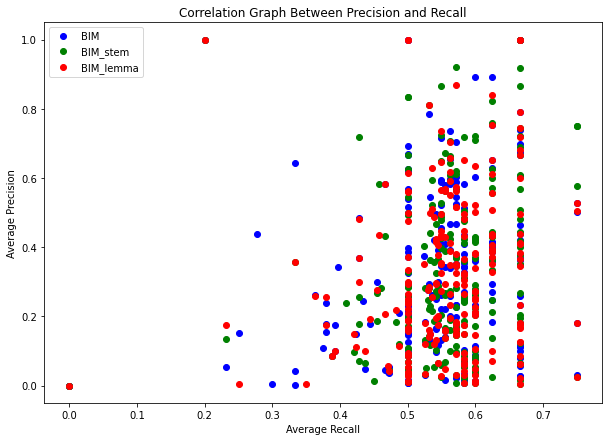

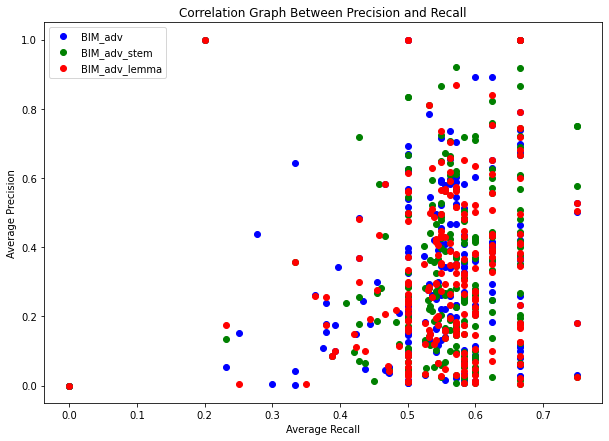

In [ ]:
plot_diagram(AR_BIM, AR_BIM_stem, AR_BIM_lemma, AP_BIM, AP_BIM_stem, AP_BIM_lemma, 'BIM')
plot_diagram(AR_BIM_adv, AR_BIM_stem_adv, AR_BIM_lemma_adv, AP_BIM_adv, AP_BIM_stem_adv, AP_BIM_lemma_adv, 'BIM_adv')

####VSM

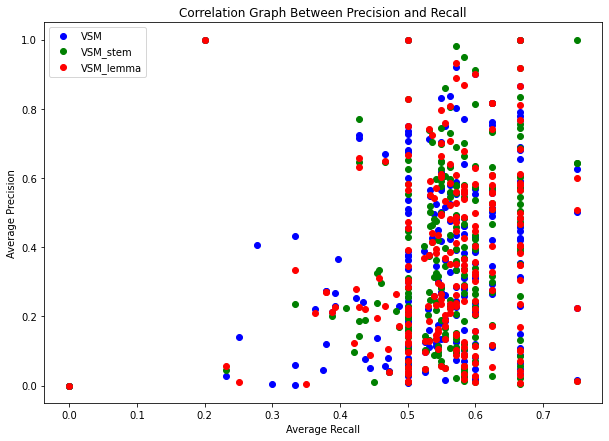

In [ ]:
plot_diagram(AR_VSM, AR_VSM_stem, AR_VSM_lemma, AP_VSM, AP_VSM_stem, AP_VSM_lemma, 'VSM')

####BM25

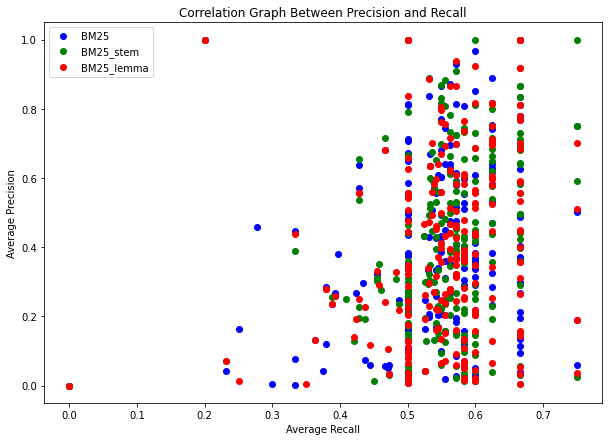

In [ ]:
plot_diagram(AR_BM25, AR_BM25_stem, AR_BM25_lemma, AP_BM25, AP_BM25_stem, AP_BM25_lemma, 'BM25')

####Whoosh

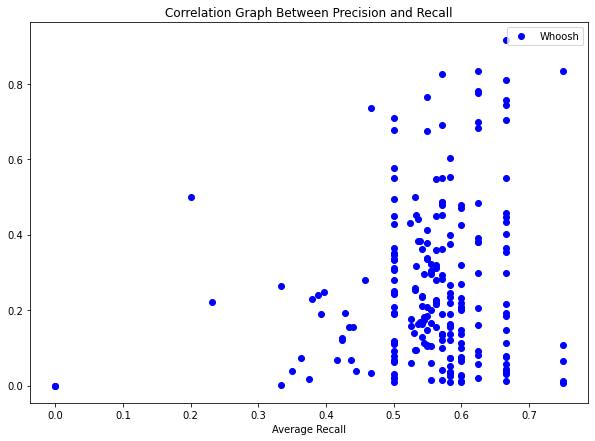

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(AR_Whoosh, AP_Whoosh, 'go', color = 'blue', label = 'Whoosh')
plt.title('Precision and Recall')
plt.xlabel('Average Recall')
plt.title('Correlation Graph Between Precision and Recall')
plt.legend(loc = 'best')
plt.show()

####Toàn bài

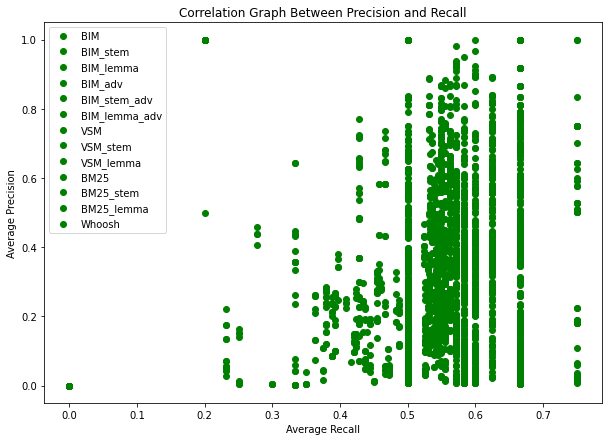

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(AR_BIM, AP_BIM, 'go', label = 'BIM')
plt.plot(AR_BIM_stem, AP_BIM_stem, 'go', label = 'BIM_stem')
plt.plot(AR_BIM_lemma, AP_BIM_lemma, 'go', label = 'BIM_lemma')
plt.plot(AR_BIM_adv, AP_BIM_adv, 'go', label = 'BIM_adv')
plt.plot(AR_BIM_stem_adv, AP_BIM_stem_adv, 'go', label = 'BIM_stem_adv')
plt.plot(AR_BIM_lemma_adv, AP_BIM_lemma_adv, 'go', label = 'BIM_lemma_adv')
plt.plot(AR_VSM, AP_VSM, 'go', label = 'VSM')
plt.plot(AR_VSM_stem, AP_VSM_stem, 'go', label = 'VSM_stem')
plt.plot(AR_VSM_lemma, AP_VSM_lemma, 'go', label = 'VSM_lemma')
plt.plot(AR_BM25, AP_BM25, 'go', label = 'BM25')
plt.plot(AR_BM25_stem, AP_BM25_stem, 'go', label = 'BM25_stem')
plt.plot(AR_BM25_lemma, AP_BM25_lemma, 'go', label = 'BM25_lemma')
plt.plot(AR_Whoosh, AP_Whoosh, 'go', label = 'Whoosh')
plt.title('Correlation Graph Between Precision and Recall')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.legend(loc = 'best')
plt.show()

###Thống kê và MAP

####BIM

In [ ]:
BIM = statistical_final(query_result_BIM, quantity_term_BIM,time_not)
BIM_with_stem = statistical_final(query_result_BIM_with_stem, quantity_term_BIM_with_stem, time_stem)
BIM_with_lemma = statistical_final(query_result_BIM_with_lemma, quantity_term_BIM_with_lemma, time_lemm)
pd.DataFrame(
    [BIM,   BIM_with_stem,  BIM_with_lemma],
    index = ['BIM',  'BIM_With_Stem',  'BIM_with_lemma']
).astype(object).T

,BIM,BIM_With_Stem,BIM_with_lemma
Số lượng term được sử dụng,7772,5071,6343
Thời gian truy vấn,163.128703,104.224465,124.764244
Tổng số tài liệu trả về,155999,196596,179356
Tổng số tài liệu liên quan,1680,1744,1719
Tổng số tài liệu không liên quan,154319,194852,177637
Trung bình tài liệu trả về,693.328889,873.76,797.137778
Trung bình tài liệu liên quan,7.466667,7.751111,7.64
Trung bình tài liệu không liên quan,685.862222,866.008889,789.497778
Precision,0.010769,0.008871,0.009584
Recall,0.914535,0.949374,0.935765


In [ ]:
BIM_advanced = statistical_final(query_result_BIM_advanced, quantity_term_BIM_advanced, time_not_adv)
BIM_with_stem_advanced = statistical_final(query_result_BIM_with_stem_advanced, quantity_term_BIM_with_stem_advanced, time_stem_adv)
BIM_with_lemma_advanced = statistical_final(query_result_BIM_with_lemma_advanced, quantity_term_BIM_with_lemma_advanced, time_lemm_adv)
pd.DataFrame(
    [BIM, BIM_advanced, BIM_with_stem, BIM_with_stem_advanced, BIM_with_lemma, BIM_with_lemma_advanced],
    index = ['BIM', 'BIM_advanced',  'BIM_With_Stem', 'BIM_with_stem_advanced',   'BIM_with_lemma', 'BIM_with_lemma_advanced']
).astype(object).T

,BIM,BIM_advanced,BIM_With_Stem,BIM_with_stem_advanced,BIM_with_lemma,BIM_with_lemma_advanced
Số lượng term được sử dụng,7772,7772,5071,5071,6343,6343
Thời gian truy vấn,163.128703,14.152495,104.224465,11.916643,124.764244,12.668073
Tổng số tài liệu trả về,155999,155999,196596,196596,179356,179356
Tổng số tài liệu liên quan,1680,1680,1744,1744,1719,1719
Tổng số tài liệu không liên quan,154319,154319,194852,194852,177637,177637
Trung bình tài liệu trả về,693.328889,693.328889,873.76,873.76,797.137778,797.137778
Trung bình tài liệu liên quan,7.466667,7.466667,7.751111,7.751111,7.64,7.64
Trung bình tài liệu không liên quan,685.862222,685.862222,866.008889,866.008889,789.497778,789.497778
Precision,0.010769,0.010769,0.008871,0.008871,0.009584,0.009584
Recall,0.914535,0.914535,0.949374,0.949374,0.935765,0.935765


####VSM

In [ ]:
VSM = statistical_final(query_result_VSM, quantity_term_VSM, time_query_VSM_not_sort)
VSM_with_stem = statistical_final(query_result_VSM_with_stem, quantity_term_VSM_with_stem, time_query_VSM_stem_not_sort)
VSM_with_lemma = statistical_final(query_result_VSM_with_lemma, quantity_term_VSM_with_lemma, time_query_VSM_lemma_not_sort)
pd.DataFrame(
    [VSM,  VSM_with_stem,  VSM_with_lemma],
    index = ['VSM', 'VSM_With_Stem', 'VSM_with_lemma']
).astype(object).T

,VSM,VSM_With_Stem,VSM_with_lemma
Số lượng term được sử dụng,7772,5071,6343
Thời gian truy vấn,0.622942,0.700089,0.709502
Tổng số tài liệu trả về,155999,196596,179356
Tổng số tài liệu liên quan,1680,1744,1719
Tổng số tài liệu không liên quan,154319,194852,177637
Trung bình tài liệu trả về,693.328889,873.76,797.137778
Trung bình tài liệu liên quan,7.466667,7.751111,7.64
Trung bình tài liệu không liên quan,685.862222,866.008889,789.497778
Precision,0.010769,0.008871,0.009584
Recall,0.914535,0.949374,0.935765


In [ ]:
pd.DataFrame(
    [BIM_advanced, VSM, BIM_with_stem_advanced, VSM_with_stem, BIM_with_lemma_advanced, VSM_with_lemma],
    index = ['BIM', 'VSM', 'BIM_With_Stem', 'VSM_With_Stem',  'BIM_with_lemma', 'VSM_with_lemma']
).astype(object).T

,BIM,VSM,BIM_With_Stem,VSM_With_Stem,BIM_with_lemma,VSM_with_lemma
Số lượng term được sử dụng,7772,7772,5071,5071,6343,6343
Thời gian truy vấn,14.152495,0.622942,11.916643,0.700089,12.668073,0.709502
Tổng số tài liệu trả về,155999,155999,196596,196596,179356,179356
Tổng số tài liệu liên quan,1680,1680,1744,1744,1719,1719
Tổng số tài liệu không liên quan,154319,154319,194852,194852,177637,177637
Trung bình tài liệu trả về,693.328889,693.328889,873.76,873.76,797.137778,797.137778
Trung bình tài liệu liên quan,7.466667,7.466667,7.751111,7.751111,7.64,7.64
Trung bình tài liệu không liên quan,685.862222,685.862222,866.008889,866.008889,789.497778,789.497778
Precision,0.010769,0.010769,0.008871,0.008871,0.009584,0.009584
Recall,0.914535,0.914535,0.949374,0.949374,0.935765,0.935765


####BM25

In [ ]:
BM25 = statistical_final(query_result_BM25, '_', time_query_BM25)
BM25_stem = statistical_final(query_result_BM25_stem, '_', time_query_BM25_stem)
BM25_lemma = statistical_final(query_result_BM25_lemma, '_', time_query_BM25_lemma)
pd.DataFrame(
    [BM25, BM25_stem, BM25_lemma],
    index = ['BM25', 'BM25_stem', 'BM25_lemma']
).astype(object).T

,BM25,BM25_stem,BM25_lemma
Số lượng term được sử dụng,_,_,_
Thời gian truy vấn,1.094808,1.108042,1.096893
Tổng số tài liệu trả về,155999,196596,179356
Tổng số tài liệu liên quan,1680,1744,1719
Tổng số tài liệu không liên quan,154319,194852,177637
Trung bình tài liệu trả về,693.328889,873.76,797.137778
Trung bình tài liệu liên quan,7.466667,7.751111,7.64
Trung bình tài liệu không liên quan,685.862222,866.008889,789.497778
Precision,0.010769,0.008871,0.009584
Recall,0.914535,0.949374,0.935765


####So sánh giữa các model

In [ ]:
BIM_with_stem_advanced = statistical_final(query_result_BIM_with_stem_advanced, quantity_term_BIM_with_stem_advanced, time_stem_adv)
VSM_with_stem = statistical_final(query_result_VSM_with_stem, quantity_term_VSM_with_stem, time_query_VSM_stem_not_sort)
BM25_stem = statistical_final(query_result_BM25_stem, '_', time_query_BM25_stem)
Whoosh = statistical_final(Query_result_of_Whoosh, '_', time_query_Whoosh)
pd.DataFrame(
    [BIM_with_stem_advanced, VSM_with_stem, BM25_stem, Whoosh],
    index = ['BIM_with_stem', 'VSM_With_Stem', 'BM25_with_stem', 'Whoosh']
).astype(object).T

,BIM_with_stem,VSM_With_Stem,BM25_with_stem,Whoosh
Số lượng term được sử dụng,5071,5071,_,_
Thời gian truy vấn,11.916643,0.700089,1.108042,5.043624
Tổng số tài liệu trả về,196596,196596,196596,180218
Tổng số tài liệu liên quan,1744,1744,1744,1717
Tổng số tài liệu không liên quan,194852,194852,194852,178501
Trung bình tài liệu trả về,873.76,873.76,873.76,800.968889
Trung bình tài liệu liên quan,7.751111,7.751111,7.751111,7.631111
Trung bình tài liệu không liên quan,866.008889,866.008889,866.008889,793.337778
Precision,0.008871,0.008871,0.008871,0.009527
Recall,0.949374,0.949374,0.949374,0.934676


#Truy vấn trên văn bản tiếng anh

##Chỉ mục đảo ngược

###Chỉ mục với tất cả term có trong docs

In [ ]:
list_words = []
for i in range(0,len(Document)):
  tempt = remove_specific_characters(Document[i])
  tempt = split_word(tempt)
  list_words.append(tempt)
results = indexing_for_doc(list_words)
words, frequency, quantity, index_doc = split_indexing(results)
pd.DataFrame(
    [words, frequency, quantity, index_doc],
    index = ['Words', 'Frequency', 'Quantity', 'Index_doc']
).astype(object).T

,Words,Frequency,Quantity,Index_doc
0,a,13,11,"[2, 3, 5, 8, 10, 15, 16, 17, 20, 22, 23]"
1,able,11,10,"[8, 15, 18, 19, 20, 22, 23, 25, 28, 29]"
2,accomplishing,2,2,"[2, 3]"
3,achieving,1,1,[21]
4,across,2,2,"[4, 30]"
...,...,...,...,...
243,within,1,1,[29]
244,work,1,1,[19]
245,world,2,2,"[4, 7]"
246,would,1,1,[12]


###Chỉ mục sau khi xóa stopwords

In [ ]:
list_words = []
for i in range(0,len(Document)):
  tempt = remove_specific_characters(Document[i])
  tempt = split_word(tempt)
  tempt = remove_stopwords(tempt)
  list_words.append(tempt)
results = indexing_for_doc(list_words)
words, frequency, quantity, index_doc = split_indexing(results)
pd.DataFrame(
    [words, frequency, quantity, index_doc],
    index = ['Words', 'Frequency', 'Quantity', 'Index_doc']
).astype(object).T

,Words,Frequency,Quantity,Index_doc
0,able,11,10,"[8, 15, 18, 19, 20, 22, 23, 25, 28, 29]"
1,accomplishing,2,2,"[2, 3]"
2,achieving,1,1,[21]
3,across,2,2,"[4, 30]"
4,addition,1,1,[29]
...,...,...,...,...
191,within,1,1,[29]
192,work,1,1,[19]
193,world,2,2,"[4, 7]"
194,would,1,1,[12]


###Chỉ mục sau khi stemming và xóa stopwords

In [ ]:
list_words = []
for i in range(0,len(Document)):
  tempt = remove_specific_characters(Document[i])
  tempt = split_word(tempt)
  tempt = word_stemmer(tempt)
  tempt = remove_stopwords(tempt)
  list_words.append(tempt)
results = indexing_for_doc(list_words)
words, frequency, quantity, index_doc = split_indexing(results)
pd.DataFrame(
    [words, frequency, quantity, index_doc],
    index = ['Words', 'Frequency', 'Quantity', 'Index_doc']
).astype(object).T

,Words,Frequency,Quantity,Index_doc
0,abl,11,10,"[8, 15, 18, 19, 20, 22, 23, 25, 28, 29]"
1,accomplish,2,2,"[2, 3]"
2,achiev,1,1,[21]
3,across,2,2,"[4, 30]"
4,addit,1,1,[29]
...,...,...,...,...
167,within,1,1,[29]
168,work,1,1,[19]
169,world,2,2,"[4, 7]"
170,would,1,1,[12]


###Chỉ mục sau khi lemmatization và xóa stopwords

In [ ]:
list_words = []
for i in range(0,len(Document)):
  tempt = remove_specific_characters(Document[i])
  tempt = split_word(tempt)
  tempt = word_lemma(tempt)
  tempt = remove_stopwords(tempt)
  list_words.append(tempt)
results = indexing_for_doc(list_words)
words, frequency, quantity, index_doc = split_indexing(results)
pd.DataFrame(
    [words, frequency, quantity, index_doc],
    index = ['Words', 'Frequency', 'Quantity', 'Index_doc']
).astype(object).T

,Words,Frequency,Quantity,Index_doc
0,able,11,10,"[8, 15, 18, 19, 20, 22, 23, 25, 28, 29]"
1,accomplish,2,2,"[2, 3]"
2,achieve,1,1,[21]
3,across,2,2,"[4, 30]"
4,addition,1,1,[29]
...,...,...,...,...
173,within,1,1,[29]
174,work,1,1,[19]
175,world,2,2,"[4, 7]"
176,would,1,1,[12]


##Truy vấn

In [ ]:
take_doc_id(Document)

from whoosh import qparser
from whoosh import scoring
import whoosh.index as index
ind = index.open_dir("ind")
searcher = ind.searcher(weighting=scoring.TF_IDF())

parser = qparser.QueryParser("content", ind.schema, group=qparser.OrGroup)
!ls ./ind

_MAIN_1.toc  MAIN_ngd07hf5ahddqgg5.seg	MAIN_WRITELOCK


In [ ]:
Document

['firm related factors.',
 'an innovator is a person who develops new ideas and looks for efficient ways of accomplishing a certain task.',
 'innovation is the art of developing new ideas and looking for efficient ways of accomplishing a certain task.',
 'this means that an innovator can include people across all the professions that currently exist in the world.',
 'an innovator does not necessarily have to be a business person he or she can even be an engineer.',
 'over the years, starbucks has been investing heavily in order to promote innovation in the organisation.',
 'this is because there has been an increase in the number of coffee shops that are setting up in america and other parts of the world.',
 'as a result of this, the organisation needs to ensure that it is displays high levels of innovation so as to be able to remain competitive.',
 'recently mcdonalds ventured into the business of making and selling premium coffee.',
 'mcdonalds is a company that has the capability of

In [ ]:
kind_of_query = {'1': 'BIM', '2': 'VSM with Stem', '3': 'BM with Lemma', '4': 'Whoosh'}
print("1: BIM\n2: VSM with Stem\n3: BM with Lemma\n4: Whoosh")
print('\nSố lượng câu có trong document: ', len(Document))
print("\nMời nhập câu truy vấn:")
query = list()
query.append(input())
while (True):
  print('\n------------------------')
  print('Mời nhập kiểu truy vấn (Nhập 0 nếu muốn kết thúc chương trình):')
  n = int(input())

  if n == 0:
    break
  elif n == 1:
    list_words = listwords_not_stemandlemma(Document)
    query_list = listwords_not_stemandlemma(query)
    term_id = create_termID_forDocument(list_words)
    dictionary, vector_docs = create_Dictionary_And_VectorDoc(term_id)
    query_list = statistic_of_query(query_list)
    query_result, _ = query_BIM_advanced(query_list, dictionary, vector_docs, len(Document))

  elif n == 2:
    list_words_with_stem = listwords_and_stem(Document)
    query_list_with_stem = listwords_and_stem(query)
    dict_of_docs, vector_of_docs, id_docs = processDocumentsFromFoler(Document, list_words_with_stem)
    query_result = query_VSM(dict_of_docs, vector_of_docs, query_list_with_stem)
  
  elif n == 3:
    list_words_with_lemma = listwords_and_lemma(Document)
    query_list_with_lemma = listwords_and_lemma(query)
    bm25_lemma = BM25Okapi(list_words_with_lemma)
    query_result = query_BM25(bm25_lemma,query_list_with_lemma)

  elif n == 4:
    query = parser.parse(query[0])
    results = searcher.search(query, limit=None)
    query_ = list()
    query_result = list()
    for j in range(len(results)):
      query_.append([int(results[j]['docid']), 0])
    query_result.append(query_)
  
  n = str(n)
  print('\nKết quả truy vấn với kiểu', kind_of_query[n], 'là:')
  for id_of_doc, _ in query_result[0]:
    print(id_of_doc, ':', Document[id_of_doc - 1])
  print('\nCó', len(query_result[0]), 'kết quả trả về')

1: BIM
2: VSM with Stem
3: BM with Lemma
4: Whoosh

Số lượng câu có trong document:  30

Mời nhập câu truy vấn:
an innovator is a person who develops new ideas and looks for efficient ways of accomplishing a certain task

------------------------
Mời nhập kiểu truy vấn (Nhập 0 nếu muốn kết thúc chương trình):
1

Kết quả truy vấn với kiểu BIM là:
2 : an innovator is a person who develops new ideas and looks for efficient ways of accomplishing a certain task.
3 : innovation is the art of developing new ideas and looking for efficient ways of accomplishing a certain task.
5 : an innovator does not necessarily have to be a business person he or she can even be an engineer.
21 : this is because the employees will be always looking for more efficient ways of achieving their objectives or carrying out their tasks.
4 : this means that an innovator can include people across all the professions that currently exist in the world.
15 : through their new coffee outlets, the company is able to retai

In [ ]:
# kind_of_query = {'1': 'BIM', '2': 'VSM', '3': 'BIM with Stem', '4': 'VSM with Stem', '5': 'BIM with Lemma', '6': 'VSM with Lemma'}
# print("1: BIM\n2: VSM\n3: BIM with Stem\n4: VSM with Stem\n5: BIM with Lemma\n6: VSM with Lemma")
# print('\nSố lượng câu có trong document: ', len(Document))
# print("Số lượng term: ", compute_quantity_term(Document))
# print("\nMời nhập câu truy vấn:")
# query = list()
# query.append(input())
# while (True):
#   print('\n------------------------')
#   print('Mời nhập kiểu truy vấn (Nhập 0 nếu muốn kết thúc chương trình):')
#   n = int(input())

#   if n == 0:
#     break

#   elif n == 1:
#     list_words = listwords_not_stemandlemma(Document)
#     query_list = listwords_not_stemandlemma(query)
#     result = indexing_for_doc(list_words)
#     query_result, quantity_of_term = query_BIM(query_list, result, NUM_OF_DOC)
  
#   elif n == 2:
#     list_words = listwords_not_stemandlemma(Document)
#     query_list = listwords_not_stemandlemma(query)
#     dict_of_docs, vector_of_docs, id_docs = processDocumentsFromFoler(Document, list_words)
#     query_result = query_VSM(dict_of_docs, vector_of_docs, query_list)
#     quantity_of_term = len(dict_of_docs)

#   elif n == 3:
#     list_words_with_stem = listwords_and_stem(Document)
#     query_list_with_stem = listwords_and_stem(query)
#     result = indexing_for_doc(list_words_with_stem)
#     query_result, quantity_of_term = query_BIM(query_list_with_stem, result, NUM_OF_DOC)

#   elif n == 4:
#     list_words_with_stem = listwords_and_stem(Document)
#     query_list_with_stem = listwords_and_stem(query)
#     dict_of_docs, vector_of_docs, id_docs = processDocumentsFromFoler(Document, list_words_with_stem)
#     query_result = query_VSM(dict_of_docs, vector_of_docs, query_list_with_stem)
#     quantity_of_term = len(dict_of_docs)
  
#   elif n == 5:
#     list_words_with_lemma = listwords_and_lemma(Document)
#     query_list_with_lemma = listwords_and_lemma(query)
#     result = indexing_for_doc(list_words_with_lemma)
#     query_result, quantity_of_term = query_BIM(query_list_with_lemma, result, NUM_OF_DOC)
  
#   elif n == 6:
#     list_words_with_lemma = listwords_and_lemma(Document)
#     query_list_with_lemma = listwords_and_lemma(query)
#     dict_of_docs, vector_of_docs, id_docs = processDocumentsFromFoler(Document, list_words_with_lemma)
#     query_result = query_VSM(dict_of_docs, vector_of_docs, query_list_with_lemma)
#     quantity_of_term = len(dict_of_docs)
  
#   n = str(n)
#   print('\nSố lượng term được sử dụng: ', quantity_of_term)
#   print('\nKết quả truy vấn với kiểu', kind_of_query[n], 'là:')
#   for id_of_doc, w in query_result[0]:
#     print(id_of_doc, ':', Document[id_of_doc - 1])
#   print('\nCó', len(query_result[0]), 'kết quả trả về')